In [18]:
import skvideo.io
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    # im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, ratio, (dw, dh)

In [ ]:
# Temporal clipping
video = skvideo.io.vread("road.mp4")
outputdata = video[30*90:30*100]
skvideo.io.vwrite("road_cliped.mp4", outputdata)

In [19]:
video = skvideo.io.vread("road_cliped.mp4")

In [20]:
video[i].shape

(1080, 1920, 3)

In [17]:
# Spatial clipping
resized = []
for i in range(len(video)):
    resized.append(letterbox(video[i])[0])
resized = np.array(resized)
skvideo.io.vwrite("road_cliped_resized.mp4", resized)

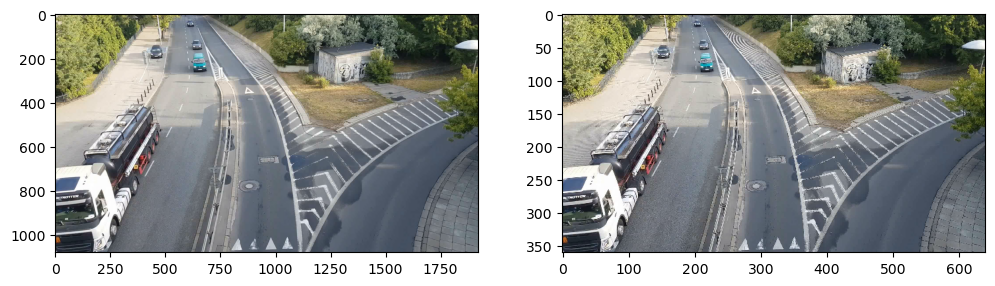

(300, 1080, 1920, 3) (300, 360, 640, 3)


In [15]:
fig, ax = plt.subplots(1,2,figsize=[12,4])
ax[0].imshow(video[0])
ax[1].imshow(resized[0])
plt.show()

print(video.shape, resized.shape)